In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Results/RequiredDataSet.csv',header=None, names=['booking_date','channel','property_id','room_name','room_id','check_in','check_out','room_rate','booking_status'])
# data.head()


In [2]:
Results = pd.read_excel('Results/DataSetWithStayDate.xlsx')
del Results['Old_Room_rate']
# Results.head()

In [63]:
scrapyData = pd.read_csv('Results/eventData2015.csv',header=None, names=['Day','Date','Event','HolidayIn'])
scrapeResult = scrapyData.dropna()
# scrapeResult.head()

In [64]:
# to avoid "SettingWithCopyWarning"
pd.options.mode.chained_assignment = None  # default='warn'

In [65]:
scrapeResult['Date'] =   '2015-' + scrapeResult['Date'] 
# scrapeResult.head()

In [66]:
scrapeResult['Date'] = pd.to_datetime(scrapeResult.Date)
# scrapeResult.head()

In [67]:
del scrapeResult['HolidayIn']
del scrapeResult['Day']
# scrapeResult.head()

In [68]:
newResults = Results.filter(['Property_id','Stay_date','Booking_status','Room_rate'], axis=1)
# newResults.head()

In [69]:
newResults = newResults[(newResults.Booking_status == 'COMPLETED') | (newResults.Booking_status == 'CONFIRMED')]
# newResults

In [70]:
newResults = newResults[(newResults.Stay_date >= '2015-01-01') & (newResults.Stay_date <= '2015-12-31')]
# newResults.head()

In [71]:
newResults['Stay_date'] = pd.to_datetime(newResults.Stay_date)
# newResults.head()

In [72]:
res = pd.merge(left=newResults, left_on='Stay_date',right=scrapeResult, right_on='Date')
# res1 = res.drop_duplicates()
res1 = res.reset_index()
del res1['index']
del res1['Date']
# res1.head()

In [73]:
res1['room_count'] = res1.groupby(['Property_id','Stay_date'])['Room_rate'].transform('count')
res2 = res1.drop_duplicates()
res2.head()

,Property_id,Stay_date,Booking_status,Room_rate,Event,room_count
0,BB,2015-01-01,COMPLETED,39500.00,New Years Day,26
2,KR,2015-01-01,COMPLETED,19387.25,New Years Day,12
3,SS,2015-01-01,COMPLETED,20130.00,New Years Day,23
4,KK,2015-01-01,COMPLETED,447.35,New Years Day,13
5,SS,2015-01-01,COMPLETED,31008.66,New Years Day,23


In [74]:
res2['totalRevenue'] = res2.groupby(['Property_id','Stay_date'])['Room_rate'].transform('sum')
res3 = res2.drop_duplicates()
res3.head()

,Property_id,Stay_date,Booking_status,Room_rate,Event,room_count,totalRevenue
0,BB,2015-01-01,COMPLETED,39500.00,New Years Day,26,226229.66
2,KR,2015-01-01,COMPLETED,19387.25,New Years Day,12,170272.65
3,SS,2015-01-01,COMPLETED,20130.00,New Years Day,23,293631.32
4,KK,2015-01-01,COMPLETED,447.35,New Years Day,13,53759.07
5,SS,2015-01-01,COMPLETED,31008.66,New Years Day,23,293631.32


In [75]:
res3['ADR'] = res3.apply(lambda res3: (res3['totalRevenue'] / res3['room_count'] ) , axis=1)
res4 =res3
res4.head()

,Property_id,Stay_date,Booking_status,Room_rate,Event,room_count,totalRevenue,ADR
0,BB,2015-01-01,COMPLETED,39500.00,New Years Day,26,226229.66,8701.140769
2,KR,2015-01-01,COMPLETED,19387.25,New Years Day,12,170272.65,14189.387500
3,SS,2015-01-01,COMPLETED,20130.00,New Years Day,23,293631.32,12766.579130
4,KK,2015-01-01,COMPLETED,447.35,New Years Day,13,53759.07,4135.313077
5,SS,2015-01-01,COMPLETED,31008.66,New Years Day,23,293631.32,12766.579130


In [76]:
# len(res4[res4.channel=="OTA"])
del res4['Booking_status']
del res4['Room_rate']
res5 = res4.drop_duplicates()
# res5

In [84]:
min(res5[res5.Property_id == 'BB']['room_count'])

3

# graph plotting

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

property_id_BB = res5[res5.Property_id == 'BB']
property_id_BB = property_id_BB.reset_index()
property_id_BB = property_id_BB.sort_values(by = 'Stay_date', ascending=True)

In [95]:
property_id_BB.loc[0]['Stay_date'].toordinal()

735599

In [110]:
x.reshape(-1)

array([735599, 735601, 735602, 735603, 735610, 735611, 735612, 735613,
       735614, 735615, 735619, 735621, 735622, 735623, 735624, 735629,
       735632, 735643, 735648, 735656, 735662, 735675, 735678, 735680,
       735685, 735689, 735690, 735691, 735693, 735702, 735703, 735704,
       735705, 735708, 735719, 735721, 735722, 735727, 735738, 735751,
       735764, 735765, 735768, 735789, 735797, 735807, 735809, 735827,
       735828, 735829, 735837, 735838, 735839, 735846, 735856, 735858,
       735859, 735862, 735864, 735865, 735866, 735873, 735883, 735884,
       735889, 735891, 735892, 735893, 735894, 735895, 735896, 735897,
       735898, 735902, 735903, 735912, 735913, 735914, 735918, 735919,
       735927, 735930, 735938, 735949, 735956, 735957, 735958], dtype=int64)

In [103]:
y.reshape(-1)

array([26, 21, 18, 17, 11, 18, 22, 17, 26, 24, 18, 19, 22, 25, 19, 21, 26,
       26, 23, 25, 19, 15, 20, 17, 15, 20, 12, 15, 15,  6,  5,  7,  8,  6,
       20, 14, 16,  8,  3, 12,  4, 11, 16,  8,  5, 12, 13, 24, 23, 26, 15,
       10, 13, 16, 15, 25, 24, 19, 18, 16, 25, 26,  3,  4, 13, 19, 16, 16,
       18, 12, 10, 14, 11, 10, 18, 25, 14, 17, 26, 25, 10, 23, 15, 13, 19,
       24, 24], dtype=int64)

In [96]:
property_id_BB.loc[0]['Stay_date']

Timestamp('2015-01-01 00:00:00')

C:\Users\Amulya\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


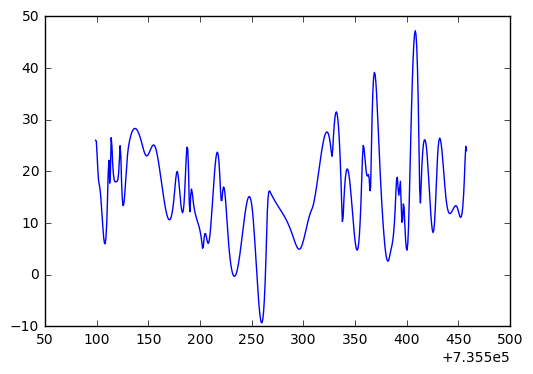

In [108]:
x= property_id_BB['Stay_date'].apply(lambda x: x.toordinal()).reshape(-1, 1)
# x = np.array(property_id_BB['Stay_date'])
y = property_id_BB['room_count']

xa = np.array(x)
ya = np.array(y)

# xa.min()
x_smooth = np.linspace(xa.min(),xa.max(), 500)
y_smooth = spline(x.reshape(-1),y.reshape(-1), x_smooth.reshape(-1))

plt.plot(x_smooth,y_smooth)
plt.show()

C:\Users\Amulya\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


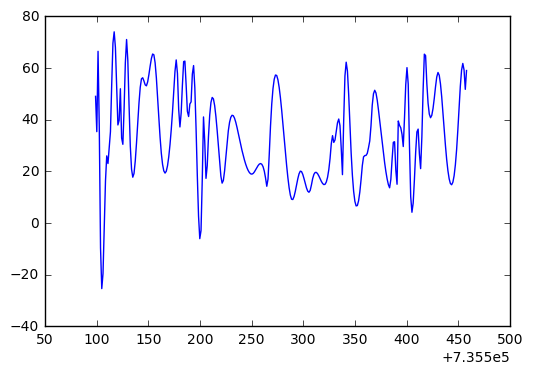

In [43]:
property_id_CH = res5[res5.Property_id == 'CH']
property_id_CH = property_id_CH.reset_index()
property_id_CH = property_id_CH.sort_values(by = 'Stay_date', ascending=True)

x= property_id_CH['Stay_date'].apply(lambda x: x.toordinal()).reshape(-1, 1)
y = property_id_CH['room_count']

xa = np.array(x)
ya = np.array(y)

x_smooth = np.linspace(xa.min(),xa.max(), 300)
y_smooth = spline(x.reshape(-1),y.reshape(-1), x_smooth.reshape(-1))

plt.plot(x_smooth,y_smooth)
plt.show()

In [ ]:
property_id_BB = pd.read_excel('Results/GroupByPropertyID/2015/BB.xlsx')
property_id_BB = property_id_BB.reset_index()
property_id_BB = property_id_BB.sort_values(by = 'Stay_date', ascending=True)
property_id_BB1 = property_id_BB.values.T.tolist()